In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder  
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA


In [2]:
Data=pd.read_csv("C:/Users/Dell/Desktop/weatherHistory.csv")
Data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [5]:
Data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Cleaning

In [8]:
#Check for duplicates
Data.duplicated().sum()

24

In [10]:
Data.drop_duplicates(inplace=True)

In [12]:
Data.duplicated().sum()

0

In [14]:
#Checks for missing (null) values in each column 
Data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [16]:
#Dropping null values
Data = Data.dropna()

In [18]:
Data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [32]:
print(Data.dtypes)

Formatted Date             object
Precip Type                object
Temperature (C)           float64
Humidity                  float64
Wind Speed (km/h)         float64
Wind Bearing (degrees)    float64
Visibility (km)           float64
dtype: object


In [20]:
Data=Data.copy()
Data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [22]:
#Dropping unnecessary columns
Data.drop("Summary",axis=1,inplace=True)

In [24]:
Data.drop("Apparent Temperature (C)",axis=1,inplace=True)

In [26]:
Data.drop("Loud Cover",axis=1,inplace=True)

In [28]:
Data.drop("Pressure (millibars)",axis=1,inplace=True)

In [30]:
Data.drop("Daily Summary",axis=1,inplace=True)

In [36]:
#Specifying numerical columns for handling outliers
numerical_columns =Data [[
    'Temperature (C)',
    'Humidity',
    'Wind Speed (km/h)',
    'Wind Bearing (degrees)',
    'Visibility (km)'
]]

In [38]:
#Handling outliers
def remove_outliers_iqr(data, columns):
    for col in columns:
        data.loc[:, col] = pd.to_numeric(data[col], errors='coerce')
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

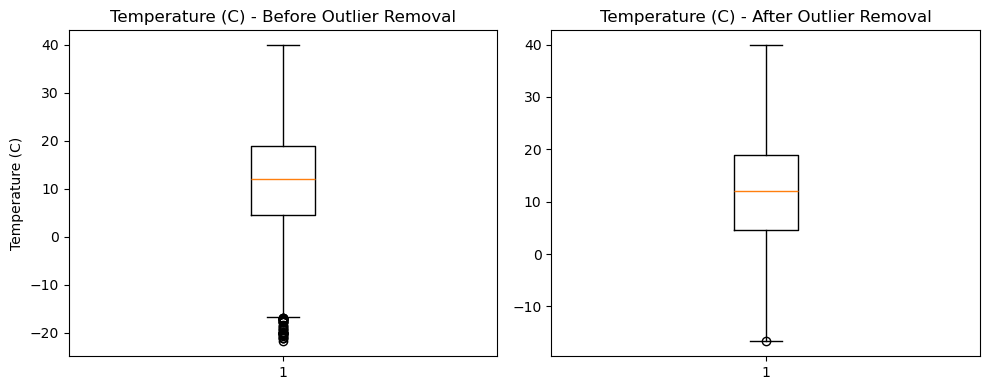

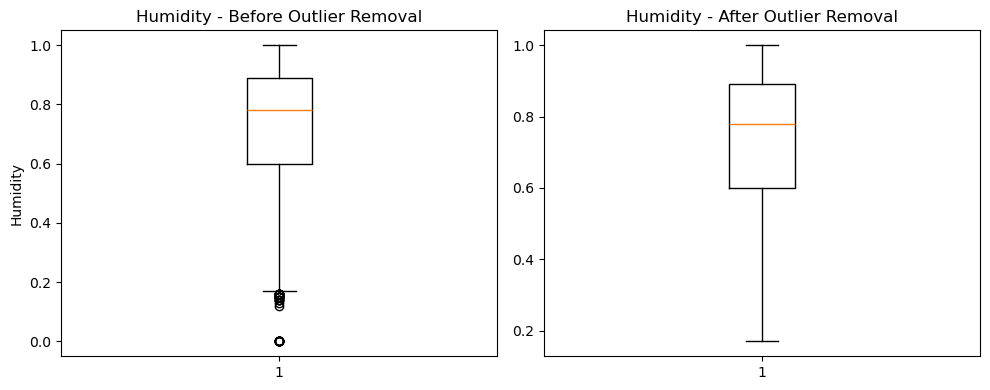

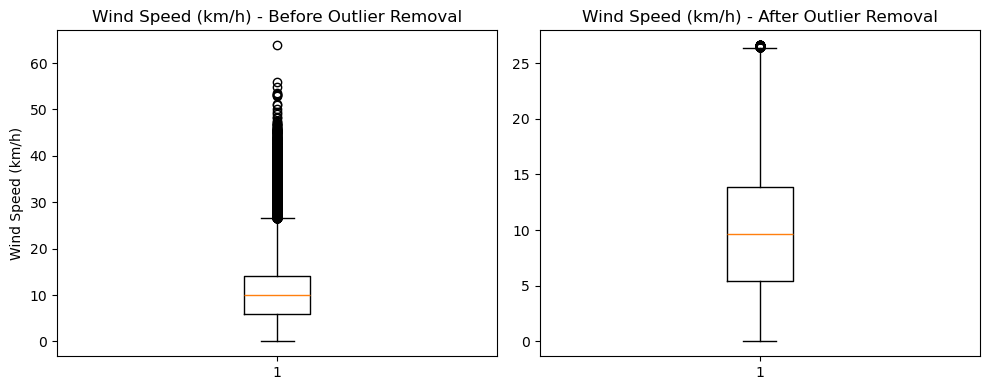

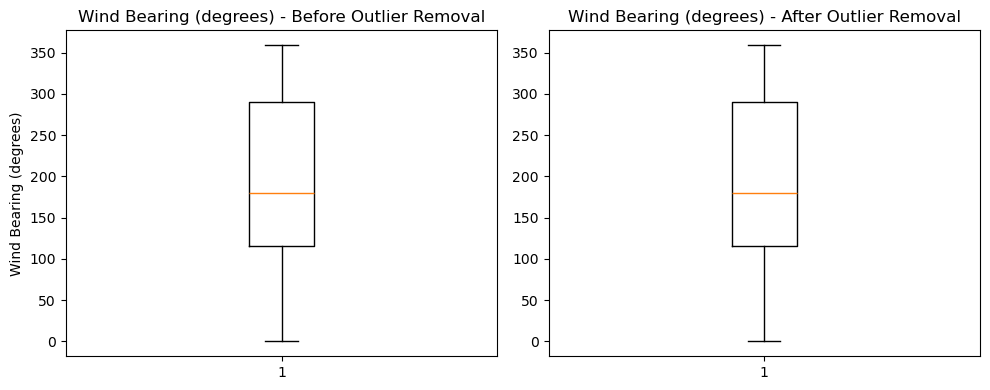

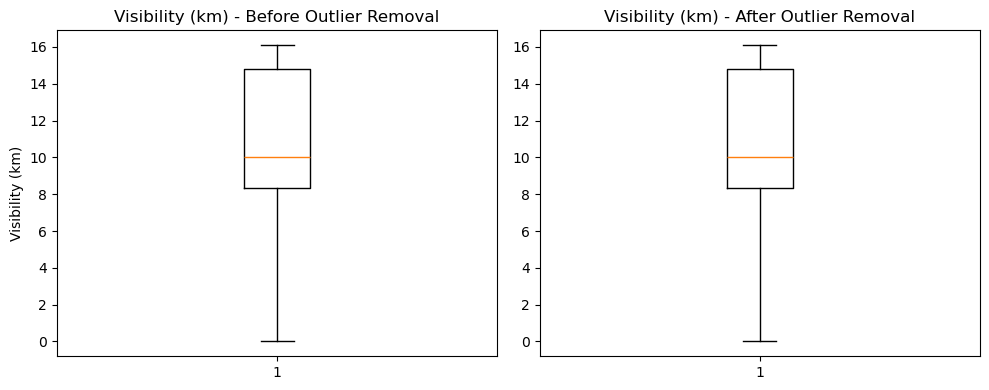

In [40]:
# Plotting before and after removing outliers
for column in numerical_columns:
    if column in Data.columns:
        # Before removing outliers
        plt.figure(figsize=(10, 4))
        
        plt.subplot(1, 2, 1)
        plt.boxplot(Data[column])
        plt.title(f'{column} - Before Outlier Removal')
        plt.ylabel(column)

        # After removing outliers
        cleaned_data = remove_outliers_iqr(Data[[column]], [column])
        
        plt.subplot(1, 2, 2)
        plt.boxplot(cleaned_data[column])
        plt.title(f'{column} - After Outlier Removal')

        plt.tight_layout()
        plt.show()


# Encoding output labels

In [43]:
le=LabelEncoder() #rain 0 snow 1
Data['Precip Type']=le.fit_transform(Data['Precip Type'])

In [45]:
Data['Precip Type'].unique()

array([0, 1])

In [49]:
# Automatically select only numeric columns for features (X)
X = Data.drop(['Precip Type', 'Formatted Date'], axis=1)  # exclude date
y = Data['Precip Type']  #target

# Splitting

In [81]:
# 60% train, 40% temp(20% Validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set: {len(X_train)} samples ({len(X_train)/len(Data)*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/len(Data)*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/len(Data)*100:.1f}%)")

Training set: 57547 samples (60.0%)
Validation set: 19182 samples (20.0%)
Test set: 19183 samples (20.0%)


# KNN Algorithm

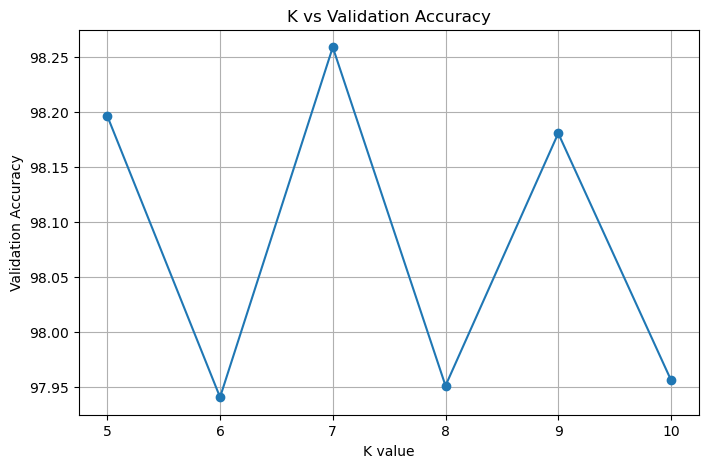

In [84]:
#Tuning K to select closest data points to identify new samples later
k_values = range(5, 11)
val_accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_val_pred)*100
    val_accuracies.append(acc)

# Plotting accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o')
plt.xlabel('K value')
plt.ylabel('Validation Accuracy')
plt.title('K vs Validation Accuracy')
plt.grid(True)
plt.show()

In [86]:
#Initializing k first, then generate best k
best_k = 0
best_score = 0

# Loop over a range of K values to find the best one
for k in range(1, 10): 
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy on the validation set
    score = accuracy_score(y_val, y_val_pred)
    
    # Update the best K if the score is higher
    if score > best_score:
        best_k = k
        best_score = score

print(f"Optimal K: {best_k} with validation set accuracy: {best_score*100}%")

Optimal K: 7 with validation set accuracy: 98.25878427692628%


In [88]:
#Accuracy on test set
final_model = KNeighborsClassifier(n_neighbors=best_k)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = final_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)

# Output the final test accuracy
print(f"Final accuracy on the test set: {test_accuracy*100}%")

Final accuracy on the test set: 98.06599593389981%


In [90]:
# Apply 10-Fold Cross-Validation on the training set (noting that k better be between 5<k<10)
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')


# Print the individual fold scores
print("Cross-Validation Scores for each fold:", cv_scores)

# Print the average accuracy across all folds
print("Average Cross-Validation Accuracy:", cv_scores.mean())



Cross-Validation Scores for each fold: [0.97871416 0.98019114 0.98114519 0.97845165 0.98001564]
Average Cross-Validation Accuracy: 0.9797035553862239


# Comparing Accuracies of validation, CV-fold and test sets

Validation Accuracy: 0.9826
Cross-Validation Accuracy (5-fold): 0.9797
Test Accuracy: 0.9807


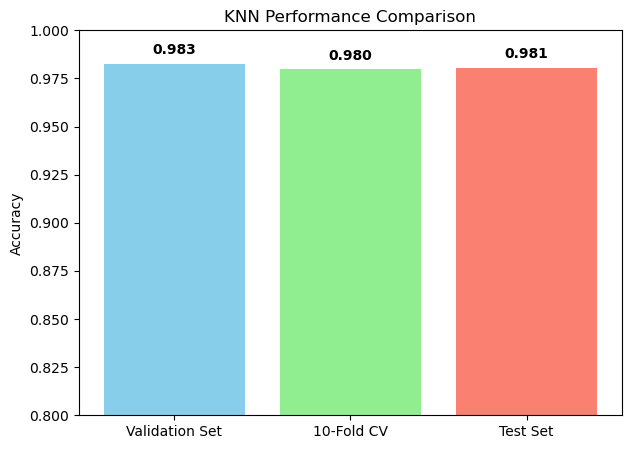

In [93]:
final_model.fit(X_train, y_train)

# Validation Set Accuracy
val_score = final_model.score(X_val, y_val)
print(f"Validation Accuracy: {val_score:.4f}")

# 5-Fold Cross-Validation on the training set
cv_score = cv_scores.mean()
print(f"Cross-Validation Accuracy (5-fold): {cv_score:.4f}")

# 5️ Final Test Set Accuracy
test_score = final_model.score(X_test, y_test)
print(f"Test Accuracy: {test_score:.4f}")


# Compare performances
scores = [val_score, cv_score, test_score]
labels = ['Validation Set', '10-Fold CV', 'Test Set']

plt.figure(figsize=(7,5))
plt.bar(labels, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel('Accuracy')
plt.title('KNN Performance Comparison')
plt.ylim(0.8, 1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.show()

# Visualizing using confusion matrix to evaluate the test set

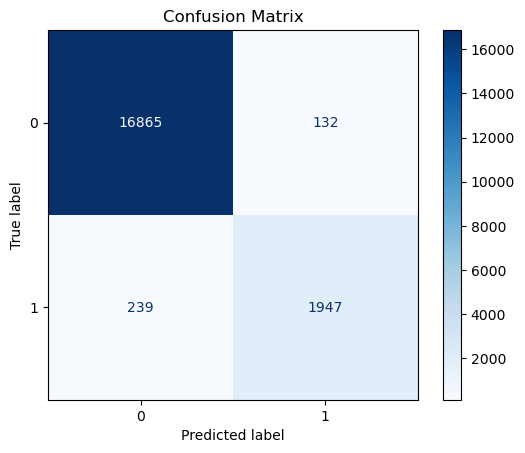

Accuracy:  98.0660%
Precision: 98.0384%
Recall:    98.0660%
F1 Score:  98.0448%


In [96]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')  # change to 'macro' or 'micro' if needed
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Accuracy:  {accuracy*100:.4f}%")
print(f"Precision: {precision*100:.4f}%")
print(f"Recall:    {recall*100:.4f}%")
print(f"F1 Score:  {f1*100:.4f}%")


In [98]:
# Observations:
# High true negative rate (16865 TN)
# true positive rate (1947 TP)
# False negative rate (132 FN)
# False positive rate (239 FP)

# Cross-validation-based model selection to reduce overfitting

In [104]:
# Define candidate models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC()
}

# Evaluate models using 5-Fold Cross-Validation
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = scores.mean()
    print(f"{name}: Average CV Accuracy = {scores.mean():.4f}")

# Select best model
best_model_name = max(cv_results, key=cv_results.get)
print(f"\nBest Model based on Cross-Validation: {best_model_name} with Accuracy = {cv_results[best_model_name]:.4f}")

Random Forest: Average CV Accuracy = 1.0000
Logistic Regression: Average CV Accuracy = 0.9985
KNN: Average CV Accuracy = 0.9786
SVM: Average CV Accuracy = 0.9862

Best Model based on Cross-Validation: Random Forest with Accuracy = 1.0000


# Visualizing Classes of Precip Type (2D/3D)

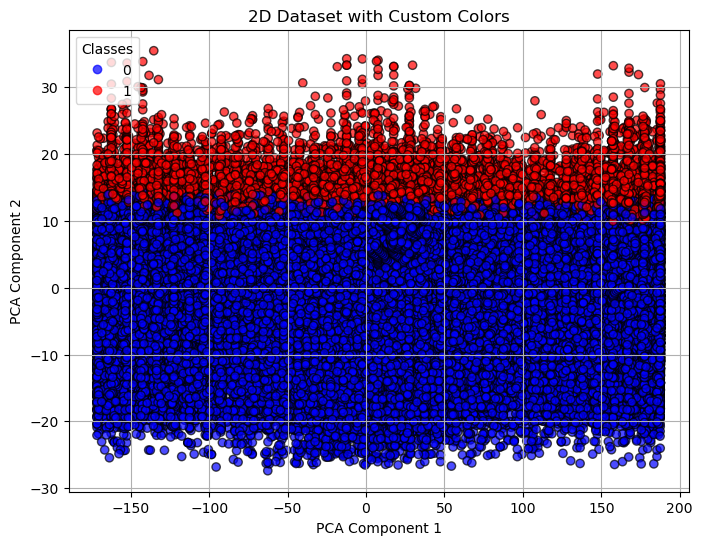

In [107]:
#rain 0 snow 1
custom_cmap = ListedColormap(["blue", "red"])

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot with custom colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=custom_cmap, edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Dataset with Custom Colors')
plt.legend(*scatter.legend_elements(), title="Classes")

plt.grid(True)
plt.show()

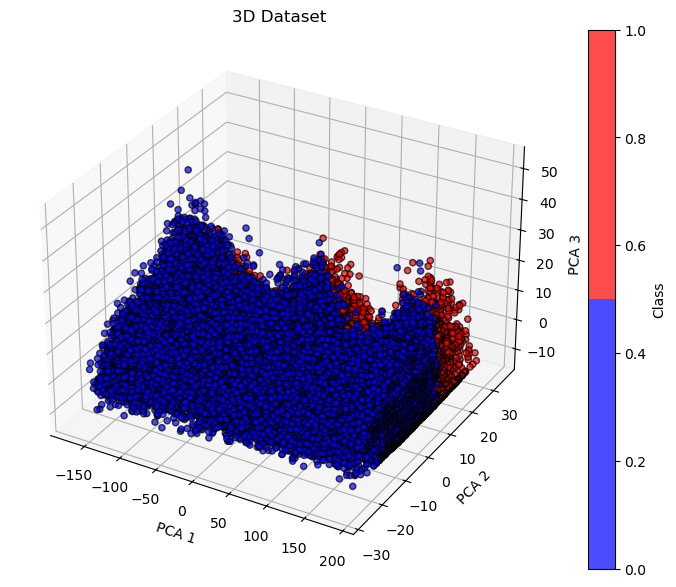

In [109]:
custom_cmap = ListedColormap(["blue", "red"])
# Reduce to 3D
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X)

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap=custom_cmap, edgecolor='k', alpha=0.7)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('3D Dataset')
fig.colorbar(scatter, ax=ax, label='Class')
plt.show()
